# 5. Data Normalization and Features Correlation

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
%matplotlib inline

# Data Normalization

In [2]:
train_file = 'house-prices-advanced-regression-techniques/train_outlier_removed.csv'
train_df = pd.read_csv(train_file)
label_col = train_df['SalePrice']

test_file = 'house-prices-advanced-regression-techniques/test_clean.csv'
test_df = pd.read_csv(test_file)

data_df = pd.concat([train_df[list(test_df)], test_df])
print(train_df.shape)
print(test_df.shape)
print(data_df.shape)

(953, 62)
(1145, 61)
(2098, 61)


## Normalize the data based on the Standard Scaler

In [3]:
from sklearn import preprocessing

x = data_df.values #returns a numpy array
standard_scaler = preprocessing.StandardScaler()
x_scaled = standard_scaler.fit_transform(x)
x_df = pd.DataFrame(x_scaled, columns=test_df.columns)
x_train = x_df.iloc[:len(train_df.index),:]
x_test = x_df.iloc[len(train_df.index):,:]

print(x_train.shape)
print(x_test.shape)

(953, 61)
(1145, 61)


## Save the normalized train and test data

In [4]:
x_train_with_labels = pd.concat([x_train, label_col], axis=1)
x_train_with_labels.to_csv('house-prices-advanced-regression-techniques/train_normalized.csv', index=False)
x_test.to_csv('house-prices-advanced-regression-techniques/test_normalized.csv', index=False)

# Data Correlation

<class 'pandas.core.frame.DataFrame'>


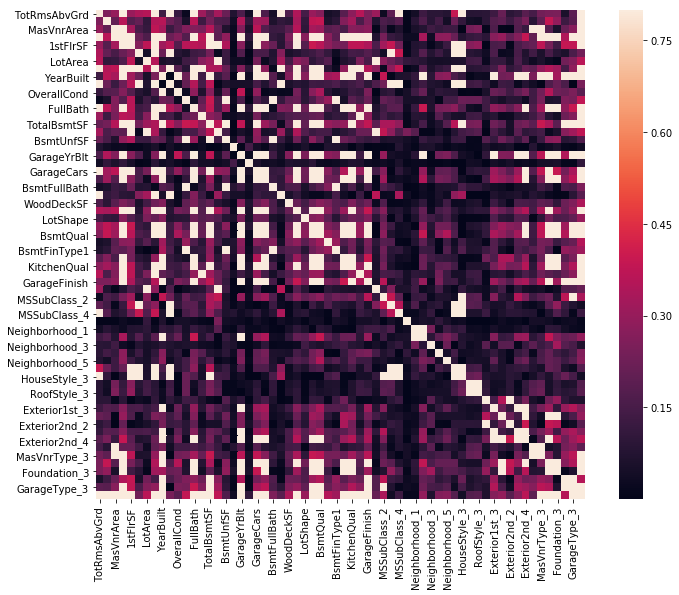

In [5]:
import seaborn as sns
import math

corrmat = train_df.corr()
print(type(corrmat))
corrmat1 = corrmat.copy().abs()

corrmat1[corrmat1>0.4]=1
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat1, vmax=.8, square=True);

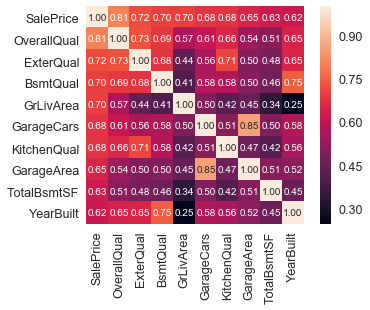

In [6]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.abs().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()